## Cross-shelf transport sections figure

In [1]:
#import gsw as sw # Gibbs seawater package

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gspec
%matplotlib inline

from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import xarray as xr
import canyon_tools.readout_tools as rout 
import canyon_tools.metrics_tools as mpt

In [2]:
sns.set_context('paper')
sns.set_style('white')

In [3]:
def plotCSPos(ax,CS1,CS2,CS3,CS4):
    ax.axvline(CS1,color='k',linestyle=':')
    ax.axvline(CS2,color='k',linestyle=':')
    ax.axvline(CS3,color='k',linestyle=':')
    ax.axvline(CS4,color='k',linestyle=':')
    
def unstagger_xarray(qty, index):
    """Interpolate u, v, or w component values to values at grid cell centres.
    
    Named indexing requires that input arrays are XArray DataArrays.

    :arg qty: u, v, or w component values
    :type qty: :py:class:`xarray.DataArray`
    
    :arg index: index name along which to centre
        (generally one of 'gridX', 'gridY', or 'depth')
    :type index: str

    :returns qty: u, v, or w component values at grid cell centres
    :rtype: :py:class:`xarray.DataArray`
    """
    
    qty = (qty + qty.shift(**{index: 1})) / 2
    
    return qty


In [4]:
#Exp
CGrid = '/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/gridGlob.nc' 
CGridOut = Dataset(CGrid)

CGridNoC = '/data/kramosmu/results/TracerExperiments/CNTDIFF/run42/gridGlob.nc' 
CGridNoCOut = Dataset(CGridNoC)

State = '/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/stateGlob.nc' 
StateNoC = '/data/kramosmu/results/TracerExperiments/CNTDIFF/run42/stateGlob.nc' 

grid = xr.open_dataset(CGrid)


In [5]:
# General input

nx = 616
ny = 360
nz = 90
nt = 19 # t dimension size 
numTr = 22 # number of tracers in total (CNT =22, 3D = 4, total = 19)

rc = CGridNoCOut.variables['RC']
dxf = CGridNoCOut.variables['dxF']
xc = rout.getField(CGridNoC, 'XC') # x coords tracer cells
yc = rout.getField(CGridNoC, 'YC') # y coords tracer cells

rA = rout.getField(CGridNoC, 'rA') 

drF = CGridNoCOut.variables['drF'] # vertical distance between faces
drC = CGridNoCOut.variables['drC'] # vertical distance between centers

hFacC = rout.getField(CGridNoC, 'HFacC')
mask_NoC = rout.getMask(CGridNoC, 'HFacC')



times = np.arange(0,nt,1)

#print(drC[:])
#print(np.shape(drC))

In [6]:
import canyon_records 
import nocanyon_records

records = canyon_records.main()
recordsNoC = nocanyon_records.main()

In [7]:
ii=0
for rec in records:
    print(ii,rec.name,rec.f)
    ii=ii+1
    
select_rec2=[0,2,4,5,6,7,12,14,15,17]
select_rec=[0,2,12,14,4,5,6,7,15]

0 CNTDIFF_run38 9.66e-05
1 CNTDIFF_run37 9.66e-05
2 CNTDIFF_run36 9.66e-05
3 CNTDIFF_run45 9.66e-05
4 CNTDIFF_run73 9.66e-05
5 CNTDIFF_run75 9.66e-05
6 CNTDIFF_run67 0.0001
7 CNTDIFF_run51 7.68e-05
8 CNTDIFF_run69 8.6e-05
9 CNTDIFF_run71 6.4e-05
10 3DVISC_run01 9.66e-05
11 3DVISC_run02 9.66e-05
12 3DVISC_run04 9.66e-05
13 3DVISC_run03 9.66e-05
14 3DVISC_run05 9.66e-05
15 3DVISC_run06 9.66e-05
16 LOWER_BF_run01 9.66e-05
17 LOW_BF_run01 9.66e-05
18 LOWEST_BF_run01 9.66e-05
19 LOWEST_BF_run03 9.66e-05
20 LOWEST_BF_run05 9.66e-05
21 LOWEST_BF_run07 7e-05
22 LOWEST_BF_run11 9.66e-05


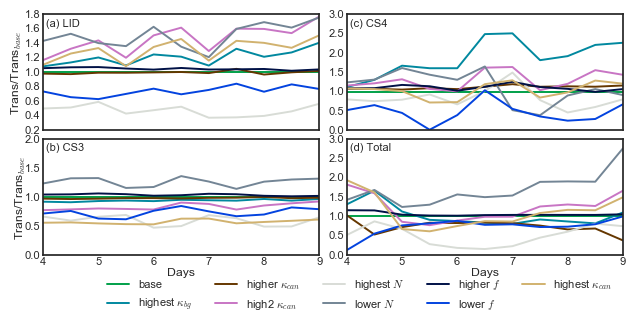

In [8]:
plt.rcParams['font.size'] = 8.0
f = plt.figure(figsize = (7.48,4.6)) # 190mm = 7.48 in, 115cm = 4.52in

gs = gspec.GridSpec(2, 2, height_ratios=[1,1,1],wspace=0.1,hspace=0.05)

ax0 = plt.subplot(gs[0,0],xticks=[])
ax1 = plt.subplot(gs[1,0])
ax2 = plt.subplot(gs[0,1],xticks=[])
ax3 = plt.subplot(gs[1,1])


index_base = 0
file = (('/data/kramosmu/results/TracerExperiments/%s/%s' %(records[index_base].exp_code,records[index_base].run_num))+
        'advTracer_CS_transports.nc')
filedif = (('/data/kramosmu/results/TracerExperiments/%s/%s' %(records[index_base].exp_code,records[index_base].run_num))+
            'difTracer_CS_transports.nc')
fileNoC = (('/data/kramosmu/results/TracerExperiments/%s/%s' %(recordsNoC[index_base].exp_code,recordsNoC[index_base].run_num))+
            'advTracer_CS_transports.nc')
dfcan_base = xr.open_dataset(file)
dfdif_base = xr.open_dataset(filedif)
dfnoc_base = xr.open_dataset(fileNoC)
vertical_base = (dfdif_base.Vert_dif_trans_sb + dfcan_base.Vert_adv_trans_sb)-dfnoc_base.Vert_adv_trans_sb   
total_base = (dfcan_base.CS1_adv_trans-dfnoc_base.CS1_adv_trans +
             dfcan_base.CS2_adv_trans-dfnoc_base.CS2_adv_trans +
             dfcan_base.CS3_adv_trans-dfnoc_base.CS3_adv_trans +
             dfcan_base.CS4_adv_trans-dfnoc_base.CS4_adv_trans +
             dfcan_base.CS5_adv_trans-dfnoc_base.CS5_adv_trans +
             vertical_base)
    
for ind in select_rec:
    file = (('/data/kramosmu/results/TracerExperiments/%s/%s' %(records[ind].exp_code,records[ind].run_num))+
        'advTracer_CS_transports.nc')
    filedif = (('/data/kramosmu/results/TracerExperiments/%s/%s' %(records[ind].exp_code,records[ind].run_num))+
            'difTracer_CS_transports.nc')
    fileNoC = (('/data/kramosmu/results/TracerExperiments/%s/%s' %(recordsNoC[ind].exp_code,recordsNoC[ind].run_num))+
            'advTracer_CS_transports.nc')
    dfcan = xr.open_dataset(file)
    dfdif = xr.open_dataset(filedif)
    dfnoc = xr.open_dataset(fileNoC)

    vertical = (dfdif.Vert_dif_trans_sb + dfcan.Vert_adv_trans_sb)-dfnoc.Vert_adv_trans_sb   
    #print('mean vert %s' %records[ind].name)
    #print(np.mean(vertical[8:18]/vertical_base[8:18]))
    ax0.plot(np.arange(1,19,1)/2.0,(vertical)/(vertical_base),color=sns.xkcd_rgb[records[ind].color])
    ax1.plot(np.arange(1,19,1)/2.0,(dfcan.CS3_adv_trans-dfnoc.CS3_adv_trans)/
             (dfcan_base.CS3_adv_trans-dfnoc_base.CS3_adv_trans),
             color=sns.xkcd_rgb[records[ind].color])
    ax2.plot(np.arange(1,19,1)/2.0,(dfcan.CS4_adv_trans-dfnoc.CS4_adv_trans)/
             (dfcan_base.CS4_adv_trans-dfnoc_base.CS4_adv_trans),
             color=sns.xkcd_rgb[records[ind].color])
    
    total = (dfcan.CS1_adv_trans-dfnoc.CS1_adv_trans +
             dfcan.CS2_adv_trans-dfnoc.CS2_adv_trans +
             dfcan.CS3_adv_trans-dfnoc.CS3_adv_trans +
             dfcan.CS4_adv_trans-dfnoc.CS4_adv_trans +
             dfcan.CS5_adv_trans-dfnoc.CS5_adv_trans +
             vertical)
    
    #print('mean total %s' %records[ind].name)
    #print(np.mean(total[8:18]/total_base[8:18]))
    
    ax3.plot(np.arange(1,19,1)/2.0,total/total_base,color=sns.xkcd_rgb[records[ind].color],label=records[ind].label)

ax1.set_xlabel('Days',labelpad=0.5)
ax3.set_xlabel('Days',labelpad=0.5)
    
ax0.set_ylabel('Trans/Trans$_{base}$',labelpad=0.5)
ax1.set_ylabel('Trans/Trans$_{base}$',labelpad=-2)

# General looks
ax0.text(0.01,0.9,'(a) LID',transform=ax0.transAxes)
ax1.text(0.01,0.9,'(b) CS3',transform=ax1.transAxes)    
ax2.text(0.01,0.9,'(c) CS4',transform=ax2.transAxes)
ax3.text(0.01,0.9,'(d) Total',transform=ax3.transAxes)    

ax3.legend(ncol=5,bbox_to_anchor=(1.0,-0.1))

ax1.tick_params(axis='x', pad=1)
ax3.tick_params(axis='x', pad=1)

ax0.tick_params(axis='y', pad=2)
ax1.tick_params(axis='y', pad=2)
ax2.tick_params(axis='y', pad=2)
ax3.tick_params(axis='y', pad=2)

ax0.set_xlim(4,9)
ax1.set_xlim(4,9)
ax2.set_xlim(4,9)
ax3.set_xlim(4,9)

#ax0.set_ylim(0.4,1.6)
ax1.set_ylim(-0,2)
#ax2.set_ylim(0,2)
#ax3.set_ylim(0,2)

plt.savefig('fig_CS_transport_sections.eps',format='eps',bbox_inches='tight')



(0, 3.5)

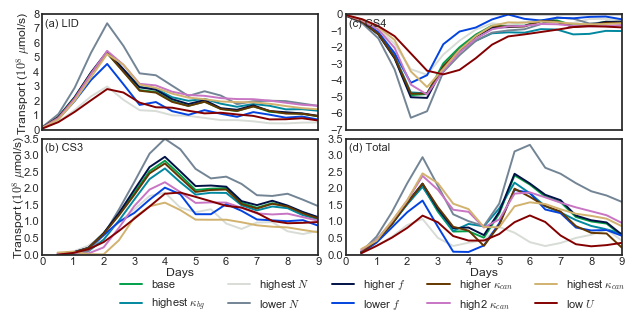

In [9]:
plt.rcParams['font.size'] = 8.0
f = plt.figure(figsize = (7.48,4.6)) # 190mm = 7.48 in, 115cm = 4.52in

gs = gspec.GridSpec(2, 2, height_ratios=[1,1,1],wspace=0.1,hspace=0.05)

ax0 = plt.subplot(gs[0,0],xticks=[])
ax1 = plt.subplot(gs[1,0])
ax2 = plt.subplot(gs[0,1],xticks=[])
ax3 = plt.subplot(gs[1,1])


# Time series
ax0.axhline(0,color='0.8',linewidth=2)
ax1.axhline(0,color='0.8',linewidth=2)
ax2.axhline(0,color='0.8',linewidth=2)
ax3.axhline(0,color='0.8',linewidth=2)

for ind in select_rec2:
    file = (('/data/kramosmu/results/TracerExperiments/%s/%s' %(records[ind].exp_code,records[ind].run_num))+
        'advTracer_CS_transports.nc')
    filedif = (('/data/kramosmu/results/TracerExperiments/%s/%s' %(records[ind].exp_code,records[ind].run_num))+
            'difTracer_CS_transports.nc')
    fileNoC = (('/data/kramosmu/results/TracerExperiments/%s/%s' %(recordsNoC[ind].exp_code,recordsNoC[ind].run_num))+
            'advTracer_CS_transports.nc')
    dfcan = xr.open_dataset(file)
    dfdif = xr.open_dataset(filedif)
    dfnoc = xr.open_dataset(fileNoC)

    vertical = (dfdif.Vert_dif_trans_sb + dfcan.Vert_adv_trans_sb)-dfnoc.Vert_adv_trans_sb   
    ax0.plot(np.arange(1,19,1)/2.0,(vertical)/1E5,color=sns.xkcd_rgb[records[ind].color])
    ax1.plot(np.arange(1,19,1)/2.0,(dfcan.CS3_adv_trans-dfnoc.CS3_adv_trans)/1E5,color=sns.xkcd_rgb[records[ind].color])
    ax2.plot(np.arange(1,19,1)/2.0,(dfcan.CS4_adv_trans-dfnoc.CS4_adv_trans)/1E5,color=sns.xkcd_rgb[records[ind].color])
    
    total = (dfcan.CS1_adv_trans-dfnoc.CS1_adv_trans +
             dfcan.CS2_adv_trans-dfnoc.CS2_adv_trans +
             dfcan.CS3_adv_trans-dfnoc.CS3_adv_trans +
             dfcan.CS4_adv_trans-dfnoc.CS4_adv_trans +
             dfcan.CS5_adv_trans-dfnoc.CS5_adv_trans +
             vertical)

    ax3.plot(np.arange(1,19,1)/2.0,total/1E5,color=sns.xkcd_rgb[records[ind].color],label=records[ind].label)

ax1.set_xlabel('Days',labelpad=0.5)
ax3.set_xlabel('Days',labelpad=0.5)
    
ax0.set_ylabel('Transport ($10^8$ $\mu$mol/s)',labelpad=0.5)
ax1.set_ylabel('Transport ($10^8$ $\mu$mol/s)',labelpad=-3)

# General looks
ax0.text(0.01,0.9,'(a) LID',transform=ax0.transAxes)
ax1.text(0.01,0.9,'(b) CS3',transform=ax1.transAxes)    
ax2.text(0.01,0.9,'(c) CS4',transform=ax2.transAxes)
ax3.text(0.01,0.9,'(d) Total',transform=ax3.transAxes)    

ax3.legend(ncol=5,bbox_to_anchor=(1.05,-0.1))

ax1.tick_params(axis='x', pad=1)
ax3.tick_params(axis='x', pad=1)

ax0.tick_params(axis='y', pad=2)
ax1.tick_params(axis='y', pad=2)
ax2.tick_params(axis='y', pad=2)
ax3.tick_params(axis='y', pad=2)

ax1.set_ylim(0,3.5)



In [10]:
# Constants and scales
L = 6400.0 # canyon length
R = 5000.0 # Upstream radius of curvature
g = 9.81 # accel. gravity
Wsb = 13000 # Width at shelf break
Hs = 147.5 # Shelf break depth
s = 0.005 # shelf slope 
W = 8300 # mid-length width
Hh=97.5 # head depth
# NOTE: The default values of all functions correspond to the base case

def Dh(f=9.66E-4,L=6400.0,N=5.5E-3):
    '''Vertical scale Dh'''
    return((f*L)/(N))
    
def Ro(U=0.37,f=9.66E-4,R=5000.0):
    '''Rossby number using radius of curvature as length scale'''
    return(U/(f*R))

def F(Ro):
    '''Function that estimates the ability of the flow to follow isobaths'''
    return(Ro/(0.9+Ro))

def Bu(N=5.5E-3,f=9.66E-5,L=6400.0,Hs=150.0):
    '''Burger number'''
    return(N*Hs/(f*L))

def RossbyRad(N=5.5E-3,Hs=150.0,f=9.66E-4):
    '''1st Rossby radius of deformation'''
    return(N*Hs/f)


In [12]:
print ("\t".join(['Name &', 'Vertical $10^{5}$ $\mu$Mm$^3$s$^{-1}$&', 'Advective vert. $10^{5}$ $\mu$Mm$^3$s$^{-1}$&',
                  'Total $10^{5}$ $\mu$Mm$^3$s$^{-1}$&',
                  'Vertical $10^{4}$ m$^3$s$^{-1}$&', 
                  'Total $10^{2}$ m$^3$s$^{-1}$&']))

select_rec = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
for ind in select_rec:
    
    file = (('/data/kramosmu/results/TracerExperiments/%s/%s' %(records[ind].exp_code,records[ind].run_num))+
        'advTracer_CS_transports.nc')
    filedif = (('/data/kramosmu/results/TracerExperiments/%s/%s' %(records[ind].exp_code,records[ind].run_num))+
            'difTracer_CS_transports.nc')
    fileNoC = (('/data/kramosmu/results/TracerExperiments/%s/%s' %(recordsNoC[ind].exp_code,recordsNoC[ind].run_num))+
            'advTracer_CS_transports.nc')
    dfcan = xr.open_dataset(file)
    dfdif = xr.open_dataset(filedif)
    dfnoc = xr.open_dataset(fileNoC)

    filew = (('/data/kramosmu/results/TracerExperiments/%s/%s' %(records[ind].exp_code,records[ind].run_num))+
        'water_CS_transports.nc')
    fileNoCw = (('/data/kramosmu/results/TracerExperiments/%s/%s' %(recordsNoC[ind].exp_code,recordsNoC[ind].run_num))+
            'water_CS_transports.nc')
    dfcanw = xr.open_dataset(filew)
    dfnocw = xr.open_dataset(fileNoCw)

    vertical = ((dfdif.Vert_dif_trans_sb + dfcan.Vert_adv_trans_sb)-dfnoc.Vert_adv_trans_sb)
    adv_vert = (dfcan.Vert_adv_trans_sb)-dfnoc.Vert_adv_trans_sb
    
    vertical_mean = np.mean(vertical[8:16])
    std_vert = np.std(vertical[8:16])
    
    adv_vert_mean = np.mean(adv_vert[8:16])
    adv_vert_std = np.std(adv_vert[8:16])
    
    verticalw = ((dfcanw.Vert_water_trans_sb)-dfnocw.Vert_water_trans_sb)
    verticalw_mean = np.mean(verticalw[8:16])
    std_vertw = np.std(verticalw[8:16])
    
    
    total = (dfcan.CS1_adv_trans-dfnoc.CS1_adv_trans +
            dfcan.CS2_adv_trans-dfnoc.CS2_adv_trans +
            dfcan.CS3_adv_trans-dfnoc.CS3_adv_trans +
            dfcan.CS4_adv_trans-dfnoc.CS4_adv_trans +
            dfcan.CS5_adv_trans-dfnoc.CS5_adv_trans +
            dfcan.CS6_adv_trans-dfnoc.CS6_adv_trans +
            vertical)
    mean_tot = np.mean(total[8:16])
    std_tot = np.std(total[8:16])
    
    totalw = (dfcanw.CS1_water_trans-dfnocw.CS1_water_trans +
            dfcanw.CS2_water_trans-dfnocw.CS2_water_trans +
            dfcanw.CS3_water_trans-dfnocw.CS3_water_trans +
            dfcanw.CS4_water_trans-dfnocw.CS4_water_trans +
            dfcanw.CS5_water_trans-dfnocw.CS5_water_trans +
            dfcanw.CS6_water_trans-dfnocw.CS6_water_trans +
            verticalw)
    mean_totw = np.mean(totalw[8:16])
    std_totw = np.std(totalw[8:16])
  
    print ("\t".join(['%s\t&%.2f$\pm$%0.2f\t&%.2f$\pm$%0.2f\t&%.2f$\pm$%0.2f\t&%.2f$\pm$%0.2f\t&%.2f$\pm$%0.2f\t ' 
                      % (records[ind].paperName,
                        vertical_mean/1E5,std_vert/1E5,
                        adv_vert_mean/1E5,adv_vert_std/1E5,
                        mean_tot/1E5,std_tot/1E5,
                        verticalw_mean/1E4,std_vertw/1E4,
                        mean_totw/1E2,std_totw/1E2)]))
                                                              


Name &	Vertical $10^{5}$ $\mu$Mm$^3$s$^{-1}$&	Advective vert. $10^{5}$ $\mu$Mm$^3$s$^{-1}$&	Total $10^{5}$ $\mu$Mm$^3$s$^{-1}$&	Vertical $10^{4}$ m$^3$s$^{-1}$&	Total $10^{2}$ m$^3$s$^{-1}$&
Base	&1.58$\pm$0.29	&1.58$\pm$0.29	&0.46$\pm$0.13	&1.87$\pm$0.46	&-1.62$\pm$5.23	 
higher\_Kbg	&1.62$\pm$0.29	&1.62$\pm$0.29	&0.47$\pm$0.13	&1.90$\pm$0.45	&-2.42$\pm$4.62	 
highest\_Kbg	&1.86$\pm$0.27	&1.78$\pm$0.27	&0.55$\pm$0.10	&2.01$\pm$0.40	&-9.98$\pm$3.14	 
higher\_N	&1.14$\pm$0.24	&1.14$\pm$0.24	&0.29$\pm$0.09	&1.41$\pm$0.36	&-2.38$\pm$5.97	 
highest\_N	&0.73$\pm$0.20	&0.73$\pm$0.20	&0.14$\pm$0.06	&0.91$\pm$0.29	&-5.50$\pm$4.71	 
lower\_N	&2.30$\pm$0.40	&2.30$\pm$0.40	&0.79$\pm$0.18	&2.54$\pm$0.61	&-1.44$\pm$3.33	 
higher\_f	&1.66$\pm$0.32	&1.66$\pm$0.32	&0.49$\pm$0.13	&1.97$\pm$0.48	&-0.57$\pm$5.04	 
low\_f	&1.13$\pm$0.17	&1.13$\pm$0.17	&0.30$\pm$0.10	&1.30$\pm$0.33	&-11.36$\pm$6.20	 
lower\_f	&1.32$\pm$0.22	&1.32$\pm$0.22	&0.37$\pm$0.11	&1.55$\pm$0.39	&-6.10$\pm$5.74	 
lowest\_f	&0.92$\pm$